## matplotlibによるjpegファイル読み込みのメモ
  
###  ①jpegファイルの表示

 まずドキュメントの[チュートリアル](https://matplotlib.org/3.2.1/tutorials/introductory/images.html#sphx-glr-tutorials-introductory-images-py")にある方法をでファイルをプロット

使用するmatplotlibのメソッド<br>
[matplotlib.image.imread()](https://matplotlib.org/3.2.1/api/image_api.html#matplotlib.image.imread) <br>
[matplotlib.pyplot.imshow()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.imshow.html#matplotlib-pyplot-imshow)

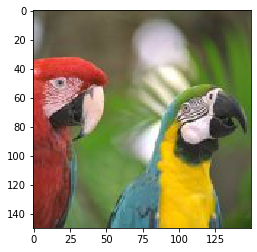

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

f_name="target_data\Parrots.jpg" #jpegファイル名


img = mpimg.imread(f_name) #jpegファイルの読み込み

imgplot = plt.imshow(img)  #jpegファイルの描画Parrots


### 2.読み込んだimgの確認

imgは[numpy](https://numpy.org/doc/stable/index.html)の[numpy.ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html#numpy.ndarray)クラスの模様、またデータは150×150 pixel のRGB3色データ(画素は0～255の整数型(unit8))の模様

In [2]:
type(img)

numpy.ndarray

In [3]:
img.shape

(150, 150, 3)

In [4]:
img.dtype

dtype('uint8')

In [5]:
img.size,150*150*3

(67500, 67500)

### 3.imgplotの確認

In [6]:
type(imgplot)

matplotlib.image.AxesImage

In [7]:
"imshow" in dir(imgplot)

False

In [8]:
type(imgplot.axes)

matplotlib.axes._subplots.AxesSubplot

In [9]:
"imshow" in dir(imgplot.axes)

True

調べた結果imgplotは[matplotlib.image.AxesImage](https://matplotlib.org/3.2.1/api/image_api.html#matplotlib.image.AxesImage)クラス,
imshow()メソッドは持たないが、そのアトリビュートにaxesがあり、その型を調べるとmatplotlib.axes.\_subplots.AxesSubplotクラスでさらにそのアトリビュートを見る限りおそらく[matplotlib.axes](https://matplotlib.org/3.2.1/api/axes_api.html#the-axes-class)の近縁のと思われ、axexクラスのメソッドが有効そうなのでとりあえずset_xtick(),set_ytick()メソッドで目盛を外してみる。(引数として空のリスト\[ \]を渡すだけ)

[]

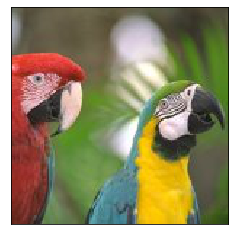

In [10]:
imgplot = plt.imshow(img)
imgplot.axes.set_xticks([]) #x軸の目盛を削除
imgplot.axes.set_yticks([]) #y軸の目盛を削除

### 4.グレイスケールとRGBの分離とマルチプロット

まず画素のRGB各RGBのみを取り出す。  
[チュートリアル](https://matplotlib.org/3.2.1/tutorials/introductory/images.html#sphx-glr-tutorials-introductory-images-py)のやり方を参考にすると各色一行のコードで記述可能。(おをらくnumpyの機能)

チュートリアル曰く画素がRGB(またはRGBA)の場合0-255整数(uint8)か0-1の少数(float32)をサポートするが、グレイスケールの場合float32型の値のみのサポートとのこなのでとりあえず\[0:1\]にスケーリング

※チュートリアルではグレースケールと言っているが厳密には単色画素もしくは[imshow()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.imshow.html#matplotlib-pyplot-imshow)のリファランスの言葉を借りてscalar dataというのが妥当そう。

RGBの画素の平均値をとってgscale_imgとする。これはnumpy.ndarayの[mean()](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.mean.html#numpy.ndarray.mean)メソッドで簡単にできる。
ついでに\[0:1\]にスケーリング。<br>
また後述の理由により反転

In [11]:
red_img   = img[:,:,0] /255.  #R値の取り出し及び[0 to 256](uint8) →[0 to 1](float)のスケーリング
green_img = img[:,:,1] /255.  #G値の取り出し及び[0 to 256](uint8) →[0 to 1](float)のスケーリング
blue_img  = img[:,:,2] /255.  #B値の取り出し及び[0 to 256](uint8) →[0 to 1](float)のスケーリング

gscale_img = 1. - img.mean(2)/255. #RGBの平均値取得及び[0 to 256](uint8) →[0 to 1](float)のスケーリング、反転

以下で確認してる通りマルチプロットするための[)matlibplo.pyplot.subplots()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.subplots.html?highlight=subplots#matplotlib.pyplot.subplot)で生成されたAxesオブジェクト(以下ではaxs\[\]\[\])にも[ishow()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.axes.Axes.imshow.html#matplotlib.axes.Axes.imshow)メソッドがあり、リファランスを見る限りでは先に使った[matplotlib.pyplot.imshow()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.imshow.html#matplotlib-pyplot-imshow)と内容は同じそうなのでaxs[i][j].imshow()で作った各データのマルチプロットでの描画を試してみる。

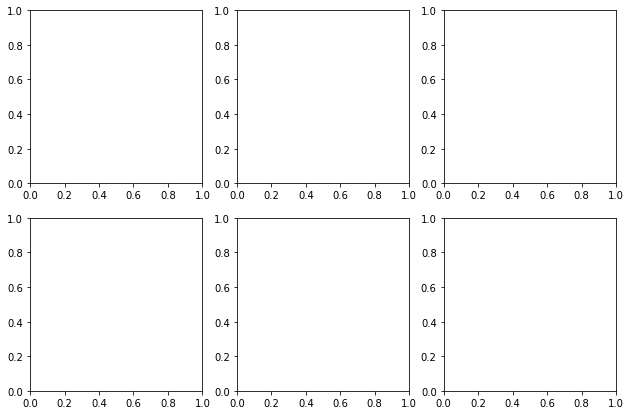

In [12]:
fig, axs = plt.subplots(2, 3,figsize=[10.5,7.])   #2x3のマルチっプロットの作成

In [13]:
type(axs[0][0])

matplotlib.axes._subplots.AxesSubplot

In [14]:
"imshow" in dir(axs[0][0])

True

ここで[imshow()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.axes.Axes.imshow.html#matplotlib.axes.Axes.imshow)の引数cmapは単色画像(scalor data)を表示する場合のカラーマップを指定するもので、この[リンク](https://matplotlib.org/3.2.1/tutorials/colors/colormaps.html)先が詳しい

RGB各色に対応したグラデーションパターン"Reds","Greens","Blues"もあり各色の表示にはそれを使う、ただし、グレースケールも"Greys"としてあるが先ほどRGBの平均値を使う場合は注意が必要、RGBは光の三原色なので平均値をとると輝度値相当(0が黒で1が白)になる、一方"Greys"は値が大きくなるにつれて白→黒となるパターンとなる。これが先ほどグレースケールで反転を使った理由。<br>
※後述の通り厳密にはRGBの平均は輝度値ではない

Text(0.5, 1.0, 'Blue')

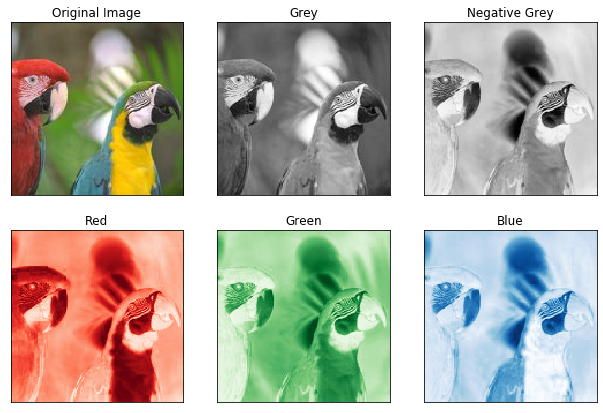

In [15]:
fig, axs = plt.subplots(2, 3,figsize=[10.5,7.])   #2x3のマルチっプロットの作成


axs[0][0].imshow(img)
axs[0][0].set_xticks([])
axs[0][0].set_yticks([])
axs[0][0].set_title("Original Image")

axs[0][1].imshow(gscale_img,cmap="Greys")
axs[0][1].set_xticks([])
axs[0][1].set_yticks([])
axs[0][1].set_title("Grey")

axs[0][2].imshow(1.-gscale_img,cmap="Greys")    #グレースケールの反転
axs[0][2].set_xticks([])
axs[0][2].set_yticks([])
axs[0][2].set_title("Negative Grey")

axs[1][0].imshow(red_img,cmap="Reds")
axs[1][0].set_xticks([])
axs[1][0].set_yticks([])
axs[1][0].set_title("Red")

axs[1][1].imshow(green_img,cmap="Greens")
axs[1][1].set_xticks([])
axs[1][1].set_yticks([])
axs[1][1].set_title("Green")

axs[1][2].imshow(blue_img,cmap="Blues")
axs[1][2].set_xticks([])
axs[1][2].set_yticks([])
axs[1][2].set_title("Blue")


作った単色画質にたいして色々演算などをやっていても思い通りに描画できないので調べてみると、[imshow()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.axes.Axes.imshow.html#matplotlib.axes.Axes.imshow)メソッドでは単色スケールの表示はデフォルトでは画素値の最大値=>1、最小値=>0となるようにオートスケールされており、そのスケールを固定するためにはimshow()のNormパラメータで設定可能とのこと。

Normパラメータとしては[matplotlib.colors.Normalize](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.colors.Normalize.html#matplotlib.colors.Normalize)クラスを渡す必要があり、matplotlib.colorsモジュールをmcolとしてインポートしてnormalize_fixというインスタンス(0～1に固定の意味、、)を作ってみた。
以上によりオートスケールの無効化を試してみる。<br>
(おそらくカラーバー表示のグラフとかでも同様の手法が応用できると思われる。)<br>

出力の下段の通り画素値を半分にしたときオートスケール有効だと元の画像と変わらないがオートスケールを無効にすると薄く表示される。

Text(0.5, 1.0, 'Grey/2.0 without Autoscale')

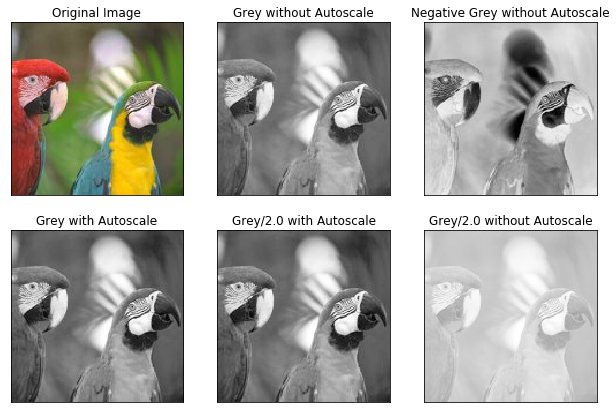

In [16]:
import matplotlib.colors as mpcol

normalize_fix=mpcol.Normalize(0,1)

fig, axs = plt.subplots(2, 3,figsize=[10.5,7.]) 

axs[0][0].imshow(img)
axs[0][0].set_xticks([])
axs[0][0].set_yticks([])
axs[0][0].set_title("Original Image")

axs[0][1].imshow(gscale_img,cmap="Greys",norm=normalize_fix)
axs[0][1].set_xticks([])
axs[0][1].set_yticks([])
axs[0][1].set_title("Grey without Autoscale")

axs[0][2].imshow(1.-gscale_img,cmap="Greys",norm=normalize_fix)
axs[0][2].set_xticks([])
axs[0][2].set_yticks([])
axs[0][2].set_title("Negative Grey without Autoscale")

axs[1][0].imshow(gscale_img,cmap="Greys")
axs[1][0].set_xticks([])
axs[1][0].set_yticks([])
axs[1][0].set_title("Grey with Autoscale")

axs[1][1].imshow(gscale_img/2.,cmap="Greys")
axs[1][1].set_xticks([])
axs[1][1].set_yticks([])
axs[1][1].set_title("Grey/2.0 with Autoscale")

axs[1][2].imshow(gscale_img/2.,cmap="Greys",norm=normalize_fix)
axs[1][2].set_xticks([])
axs[1][2].set_yticks([])
axs[1][2].set_title("Grey/2.0 without Autoscale")


さらに[imshow()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.axes.Axes.imshow.html#matplotlib.axes.Axes.imshow)の説明をよく読んでみると直接引数としてvmin,vmaxを指定できそうなのがわかったのでその方法も試してみる。こっちのほうが簡単

Text(0.5, 1.0, 'Grey/2.0 without Autoscale')

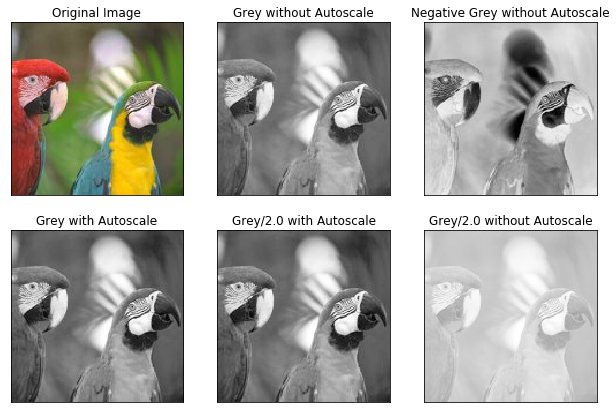

In [17]:
fig, axs = plt.subplots(2, 3,figsize=[10.5,7.]) 

axs[0][0].imshow(img)
axs[0][0].set_xticks([])
axs[0][0].set_yticks([])
axs[0][0].set_title("Original Image")

axs[0][1].imshow(gscale_img,cmap="Greys",vmin=0,vmax=1)
axs[0][1].set_xticks([])
axs[0][1].set_yticks([])
axs[0][1].set_title("Grey without Autoscale")

axs[0][2].imshow(1.-gscale_img,cmap="Greys",vmin=0,vmax=1)
axs[0][2].set_xticks([])
axs[0][2].set_yticks([])
axs[0][2].set_title("Negative Grey without Autoscale")

axs[1][0].imshow(gscale_img,cmap="Greys")
axs[1][0].set_xticks([])
axs[1][0].set_yticks([])
axs[1][0].set_title("Grey with Autoscale")

axs[1][1].imshow(gscale_img/2.,cmap="Greys")
axs[1][1].set_xticks([])
axs[1][1].set_yticks([])
axs[1][1].set_title("Grey/2.0 with Autoscale")

axs[1][2].imshow(gscale_img/2.,cmap="Greys",vmin=0,vmax=1)
axs[1][2].set_xticks([])
axs[1][2].set_yticks([])
axs[1][2].set_title("Grey/2.0 without Autoscale")


調子に乗ってvmin,vmaxをいろいろいじってみる  
当然vmin<vmaxでないとエラーが出る。

Text(0.5, 1.0, 'Grey  vmin=0,vmax=0.5')

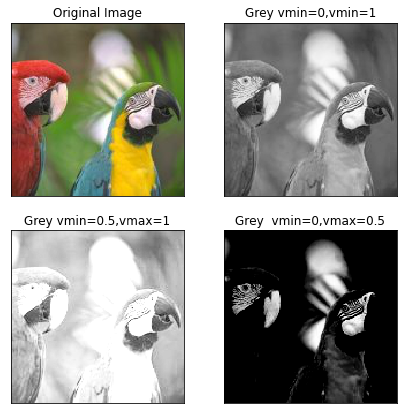

In [18]:
fig, axs = plt.subplots(2, 2,figsize=[7.,7.]) 

axs[0][0].imshow(img)
axs[0][0].set_xticks([])
axs[0][0].set_yticks([])
axs[0][0].set_title("Original Image")

axs[0][1].imshow(gscale_img,cmap="Greys",vmin=0,vmax=1)
axs[0][1].set_xticks([])
axs[0][1].set_yticks([])
axs[0][1].set_title("Grey vmin=0,vmin=1")

axs[1][0].imshow(gscale_img,cmap="Greys",vmin=0.5,vmax=1)
axs[1][0].set_xticks([])
axs[1][0].set_yticks([])
axs[1][0].set_title("Grey vmin=0.5,vmax=1")

axs[1][1].imshow(gscale_img,cmap="Greys",vmin=0.0,vmax=0.5)
axs[1][1].set_xticks([])
axs[1][1].set_yticks([])
axs[1][1].set_title("Grey  vmin=0,vmax=0.5")

### 5.YCbCr表色系への変換

ここまではRGBの平均で輝度を算出していたが、厳密には輝度値は人間の目のRGBの各感度に考慮した以下のYCbCr系に変換したY値が使われる。  
ここではYCbCrを算出する。(ITU-R BT.601を参照)

輝度：Y = 0.29900×R + 0.58700×G + 0.11400×B  
色差(b)：Cb = −0.16874×R − 0.33126×G + 0.50000×B  
色差(r)：Cr = 0.50000×R − 0.41869×G − 0.081×B

因みに逆変換は以下のとおり

R = Y + 1.40200×Cr  
G = Y − 0.34414×Cb − 0.71414×Cr  
B = Y + 1.77200×Cb

In [19]:
Y_img = 0.29900*red_img + 0.58700*green_img + 0.11400*blue_img
Cb_img = -0.1687*red_img  - 0.33126*green_img + 0.50000*blue_img
Cr_img = 0.50000*red_img  - 0.41869*green_img - 0.081*blue_img

変換した輝度Yと先ほどのRGB平均値で算出した輝度らしきものをプロットする。  
ついでにCb,Crもプロットしているが負もとるので0.5オフセットしている。


Text(0.5, 1.0, 'Negative Grey Scale from Y (zoom up)')

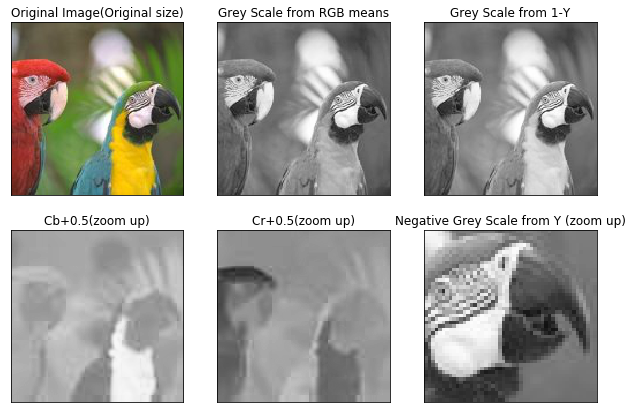

In [20]:
fig, axs = plt.subplots(2, 3,figsize=[10.5,7.]) 

axs[0][0].imshow(img)
axs[0][0].set_xticks([])
axs[0][0].set_yticks([])
axs[0][0].set_title("Original Image(Original size)")

axs[0][1].imshow(gscale_img,cmap="Greys",vmin=0,vmax=1)
axs[0][1].set_xticks([])
axs[0][1].set_yticks([])
axs[0][1].set_title("Grey Scale from RGB means")

axs[0][2].imshow(1-Y_img,cmap="Greys",vmin=0,vmax=1)
axs[0][2].set_xticks([])
axs[0][2].set_yticks([])
axs[0][2].set_title("Grey Scale from 1-Y")

axs[1][0].imshow(Cb_img+0.5,cmap="Greys",vmin=0,vmax=1)
axs[1][0].set_xticks([])
axs[1][0].set_yticks([])
axs[1][0].set_title("Cb+0.5(zoom up)")

axs[1][1].imshow(Cr_img+0.5,cmap="Greys",vmin=0,vmax=1)
axs[1][1].set_xticks([])
axs[1][1].set_yticks([])
axs[1][1].set_title("Cr+0.5(zoom up)")

axs[1][2].imshow(1-Y_img[50:99,100:149],cmap="Greys",vmin=0,vmax=1)
axs[1][2].set_xticks([])
axs[1][2].set_yticks([])
axs[1][2].set_title("Negative Grey Scale from Y (zoom up)")

目立った違いとしてはRGBの平均値に対してオリジナルの黄色い箇所がY輝度のほうが目立って明るくなっていることがわかる。  
これは黄色がYCbCr変換時のRGBでRed,Greenの合成であることに起因するものと考えられるれる。(そこの部分ではCb成分はは小さく、Cr成分が大きくなっている)  
ほかの部分は目視では目立った違いは見受けられず。


どの程度差があるのかを引き算して確認してみる  
差分値こちらも負数がありうるが小さい値になることが予測されるためvmin=-0.3,vmax=0.3とした、


Text(0.5, 1.0, 'RGB means - Y')

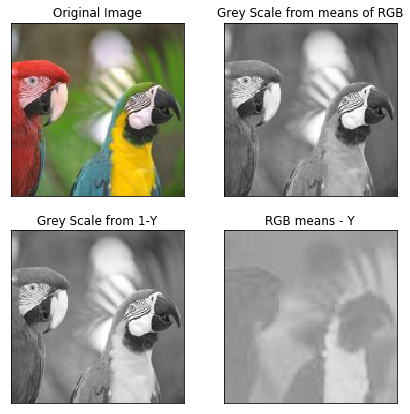

In [21]:
fig, axs = plt.subplots(2, 2,figsize=[7.,7.]) 

axs[0][0].imshow(img)
axs[0][0].set_xticks([])
axs[0][0].set_yticks([])
axs[0][0].set_title("Original Image")

axs[0][1].imshow(gscale_img,cmap="Greys",vmin=0,vmax=1)
axs[0][1].set_xticks([])
axs[0][1].set_yticks([])
axs[0][1].set_title("Grey Scale from means of RGB")

axs[1][0].imshow(1-Y_img,cmap="Greys",vmin=0,vmax=1)
axs[1][0].set_xticks([])
axs[1][0].set_yticks([])
axs[1][0].set_title("Grey Scale from 1-Y")

axs[1][1].imshow(1.-gscale_img-Y_img,cmap="Greys",vmin=-0.3,vmax=0.3)
axs[1][1].set_xticks([])
axs[1][1].set_yticks([])
axs[1][1].set_title("RGB means - Y")

この右下の差分画像はNuetral Grey(中間値)が差分0でそこを基準に明るい箇所が輝度Y大、暗いところが輝度Y小となるのでわかりにくい。

[カラーマップ](https://matplotlib.org/3.2.1/tutorials/colors/colormaps.html)をもう少し調べたらこれまで使ってたsequential Collormapの"Greys"ではなく Diverging Collormapの"bwr"がよさそうなので使ってみる\

Diverging Collormapを使うと例えば"bwr"では中間値が白でそれより小さいところが青、大きいところが赤となるのでわかりやすい。

Text(0.5, 1.0, '(means of RGB) - Y')

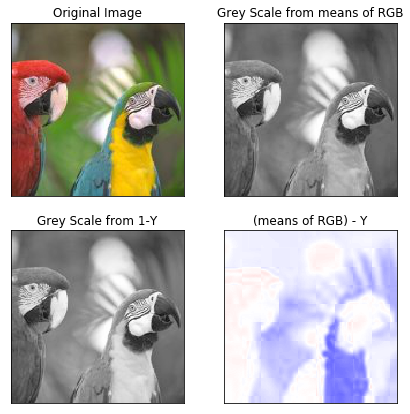

In [22]:
fig, axs = plt.subplots(2, 2,figsize=[7.,7.]) 

axs[0][0].imshow(img)
axs[0][0].set_xticks([])
axs[0][0].set_yticks([])
axs[0][0].set_title("Original Image")

axs[0][1].imshow(gscale_img,cmap="Greys",vmin=0,vmax=1)
axs[0][1].set_xticks([])
axs[0][1].set_yticks([])
axs[0][1].set_title("Grey Scale from means of RGB")

axs[1][0].imshow(1-Y_img,cmap="Greys",vmin=0,vmax=1)
axs[1][0].set_xticks([])
axs[1][0].set_yticks([])
axs[1][0].set_title("Grey Scale from 1-Y")

axs[1][1].imshow(1.-gscale_img-Y_img,cmap="bwr",vmin=-0.3,vmax=0.3)
axs[1][1].set_xticks([])
axs[1][1].set_yticks([])
axs[1][1].set_title("(means of RGB) - Y")

だいたい
全般的に輝度に対してRGBのうち加重の高いグリーン成分が多いからだろうが、全般的に青っぽく(Y>means of RGB)なる画像が得られた

※輝度：Y = 0.29900×R + 0.58700×G + 0.11400×B

目視と同じように原画の黄色部分で薄くなってる差分画像が得られた。

次はY,Cb,Crの中段右側付近部分を拡大(zoom up)したものをプロットしてみる。

Text(0.5, 1.0, 'Grey Scale from Y (zoom up)p')

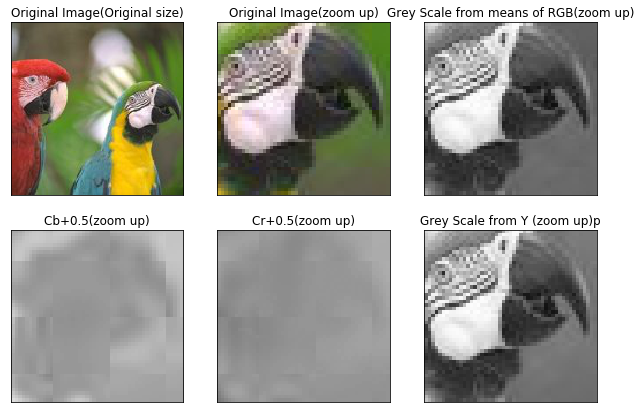

In [23]:
fig, axs = plt.subplots(2, 3,figsize=[10.5,7.]) 

axs[0][0].imshow(img)
axs[0][0].set_xticks([])
axs[0][0].set_yticks([])
axs[0][0].set_title("Original Image(Original size)")

axs[0][1].imshow(img[55:104,100:149,:])
axs[0][1].set_xticks([])
axs[0][1].set_yticks([])
axs[0][1].set_title("Original Image(zoom up)")

axs[0][2].imshow(gscale_img[55:104,100:149],cmap="Greys",vmin=0,vmax=1)
axs[0][2].set_xticks([])
axs[0][2].set_yticks([])
axs[0][2].set_title("Grey Scale from means of RGB(zoom up)")

axs[1][0].imshow(Cb_img[55:104,100:149]+0.5,cmap="Greys",vmin=0,vmax=1)
axs[1][0].set_xticks([])
axs[1][0].set_yticks([])
axs[1][0].set_title("Cb+0.5(zoom up)")

axs[1][1].imshow(Cr_img[55:104,100:149]+0.5,cmap="Greys",vmin=0,vmax=1)
axs[1][1].set_xticks([])
axs[1][1].set_yticks([])
axs[1][1].set_title("Cr+0.5(zoom up)")

axs[1][2].imshow(1-Y_img[55:104,100:149],cmap="Greys",vmin=0,vmax=1)
axs[1][2].set_xticks([])
axs[1][2].set_yticks([])
axs[1][2].set_title("Grey Scale from Y (zoom up)p")

興味深いことにCb,Crに関してはブロックノイズ(16x16pixels block)が顕著に見える、、

vmin,vmaxをいじってCb,Crのコントラストを強調して、ついでにもう少し拡大してみる。

Text(0.5, 1.0, 'Grey Scale from Y (zoom up)')

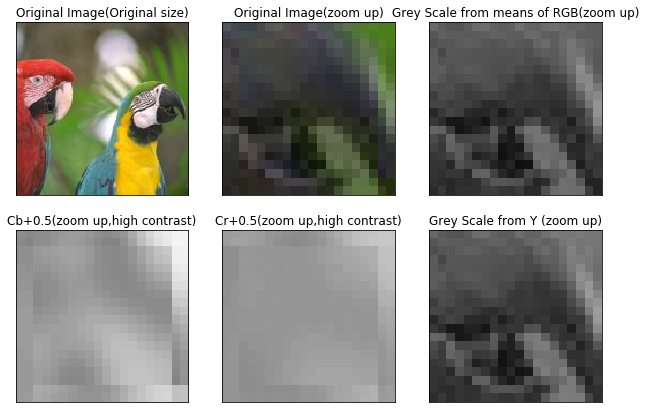

In [24]:
fig, axs = plt.subplots(2, 3,figsize=[10.5,7.]) 

axs[0][0].imshow(img)
axs[0][0].set_xticks([])
axs[0][0].set_yticks([])
axs[0][0].set_title("Original Image(Original size)")

axs[0][1].imshow(img[62:82,126:146,:])
axs[0][1].set_xticks([])
axs[0][1].set_yticks([])
axs[0][1].set_title("Original Image(zoom up)")

axs[0][2].imshow(gscale_img[62:82,126:146],cmap="Greys",vmin=0,vmax=1)
axs[0][2].set_xticks([])
axs[0][2].set_yticks([])
axs[0][2].set_title("Grey Scale from means of RGB(zoom up)")

axs[1][0].imshow(Cb_img[62:82,126:146]+0.5,cmap="Greys",vmin=0.3,vmax=0.7)
axs[1][0].set_xticks([])
axs[1][0].set_yticks([])
axs[1][0].set_title("Cb+0.5(zoom up,high contrast)")

axs[1][1].imshow(Cr_img[62:82,126:146]+0.5,cmap="Greys",vmin=0.3,vmax=0.7)
axs[1][1].set_xticks([])
axs[1][1].set_yticks([])
axs[1][1].set_title("Cr+0.5(zoom up,high contrast)")

axs[1][2].imshow(1-Y_img[62:82,126:146],cmap="Greys",vmin=0,vmax=1)
axs[1][2].set_xticks([])
axs[1][2].set_yticks([])
axs[1][2].set_title("Grey Scale from Y (zoom up)")

jpegは通常8x8pixelブロック単で処理するのでブロックノイズも8x8で出るものと想定されるが、、Cb,Cr,に関しては16x16pixcelブロック単位で発生している。Cb,Crにたいして人間の目の感度が悪いのでjpegにおいて16x16ブロックを8x8に間引きして処理していることに起因するものと思われる。  
ただ2x2pixelブロックのタイルが8x8になっているようではなく、1pixexごとに差があるのが気になる。これは変換はRGB YCbCr相互の変換過程で発生した、丸目誤差の問題かも知れないので、画素値を確認(255倍して整数値に変換)。

関係ないがここにきてnumpy.ndarraygnの
```python
Cb_img[64:80,128:144]

```
の記法が1軸目\[64～79\],2軸目\[128～143\]のデータを取り出すのに気づく。  
1軸目\[64～80\],2軸目\[128～144\]ではない

In [25]:
print((Cb_img[64:80,128:144]*255).astype("int"))

[[ -1  -2  -2  -3  -3  -2   0   2   4   5   3   0  -5  -9 -15 -18]
 [  0  -1  -2  -2  -3  -2   0   2   4   5   3   1  -3  -8 -12 -15]
 [  1   1   0  -2  -2  -2   0   2   3   5   5   2  -1  -6  -8 -10]
 [  2   2   1   0  -2   0   0   2   3   5   5   3   1  -2  -4  -6]
 [  4   2   2   0   0   0   0   1   2   3   5   4   3   1   0  -2]
 [  4   2   2   0   0  -2  -2   0   1   2   3   4   4   3   2   2]
 [  4   2   1   0  -2  -2  -2  -2   0   0   1   2   2   4   4   4]
 [  2   1   0   0  -2  -3  -5  -5  -3  -2  -2   0   1   2   3   3]
 [  0   0   0  -2  -3  -5  -6  -6  -6  -6  -5  -3  -2   0   2   2]
 [ -2  -2  -2  -2  -3  -6  -6  -9 -10 -10  -9  -6  -5  -2   0   0]
 [ -3  -3  -2  -2  -3  -4  -6  -9 -10 -11 -11 -10  -7  -6  -3  -2]
 [ -5  -3  -2  -2  -2  -3  -4  -7 -10 -12 -12 -12 -10  -9  -6  -6]
 [ -5  -4  -2   0   0  -1  -2  -6 -10 -13 -14 -14 -13 -11 -10  -9]
 [ -3  -3  -1   1   2   2   0  -4  -7 -11 -14 -15 -15 -13 -11 -10]
 [ -2  -2   0   2   3   4   2  -2  -6 -10 -13 -15 -15 -14 -12 

In [26]:
print((Cr_img[64:80,128:144]*255).astype("int"))

[[ 0  0  0  0  0  0  0  0  0 -2 -2 -4 -5 -6 -7 -7]
 [ 0  0  0  0  0  0  0  0  0 -2 -2 -4 -5 -5 -6 -7]
 [ 0  0  0  0  0  0  0  0  0  0 -2 -2 -4 -5 -5 -7]
 [ 0  0  0  0  0  0  0  0  0  0 -2 -2 -2 -4 -4 -5]
 [ 0  0  0  0  0  0  0  0  0  0  0 -2 -1 -2 -2 -4]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -2 -2]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 -2 -2  0  0  0  0  0  0]
 [ 2  0  0  0  0  0 -2 -2 -2 -2 -2 -2 -2  0  0  0]
 [ 2  2  0  0  0  0 -1 -2 -3 -3 -2 -2 -3 -2 -2 -2]
 [ 3  1  2  0  0 -2 -2 -3 -4 -4 -4 -4 -4 -3 -2 -2]
 [ 2  2  1  0  0 -2 -2 -4 -4 -4 -4 -5 -5 -4 -4 -4]
 [ 2  3  2  0  0 -2 -2 -4 -5 -4 -4 -4 -4 -5 -4 -4]]


うーんなんか違うような  
ついでにY値も印字

In [27]:
print((Y_img[64:80,128:144]*255).astype("int"))

[[ 69  73  78  75  70  68  70  73  67  64  80  87  80  92 109  97]
 [ 69  68  68  67  66  66  64  62  64  59  69  77  76  88 104 103]
 [ 67  66  66  66  66  64  62  60  62  57  58  64  73  84 101 115]
 [ 63  67  71  69  65  61  61  61  56  54  49  54  65  74  93 123]
 [ 58  61  63  65  64  61  57  56  46  49  43  43  53  58  78 116]
 [ 59  54  50  56  62  64  56  47  44  46  43  41  45  47  67 100]
 [ 56  52  48  48  53  54  51  46  45  47  45  42  41  42  56  77]
 [ 47  51  51  45  39  37  43  50  44  44  42  40  38  38  49  60]
 [ 53  49  36  35  34  42  27  38  45  37  42  44  36  36  44  44]
 [ 21  21  30  29  19  42  40  45  42  62  65  43  47  43  26  49]
 [ 51  20  24  34  39  71  49  28  75 101 102  75  50  40  40  45]
 [ 85  55  54  57  57  70  33  27  47  92 103 104  74  45  53  31]
 [ 81  75  61  45  47  53  17  27  27  78  95  96  95  64  38  39]
 [ 56  76  52  27  33  41  15  25  37  51 102  98  94  92  44  40]
 [ 35  65  56  52  43  29  22  34  17  22  85 105  93 105  76 

とりあえずいまは不可解なことは忘れて、、輝度調整をしてみる（1.3倍）

In [28]:
brightY_img=Y_img*1.3
print((Y_img[64:80,128:144]*255).astype("int"))

[[ 69  73  78  75  70  68  70  73  67  64  80  87  80  92 109  97]
 [ 69  68  68  67  66  66  64  62  64  59  69  77  76  88 104 103]
 [ 67  66  66  66  66  64  62  60  62  57  58  64  73  84 101 115]
 [ 63  67  71  69  65  61  61  61  56  54  49  54  65  74  93 123]
 [ 58  61  63  65  64  61  57  56  46  49  43  43  53  58  78 116]
 [ 59  54  50  56  62  64  56  47  44  46  43  41  45  47  67 100]
 [ 56  52  48  48  53  54  51  46  45  47  45  42  41  42  56  77]
 [ 47  51  51  45  39  37  43  50  44  44  42  40  38  38  49  60]
 [ 53  49  36  35  34  42  27  38  45  37  42  44  36  36  44  44]
 [ 21  21  30  29  19  42  40  45  42  62  65  43  47  43  26  49]
 [ 51  20  24  34  39  71  49  28  75 101 102  75  50  40  40  45]
 [ 85  55  54  57  57  70  33  27  47  92 103 104  74  45  53  31]
 [ 81  75  61  45  47  53  17  27  27  78  95  96  95  64  38  39]
 [ 56  76  52  27  33  41  15  25  37  51 102  98  94  92  44  40]
 [ 35  65  56  52  43  29  22  34  17  22  85 105  93 105  76 

先ほどの変換の式より新しいY値をのYCbCrをRGBに戻す。(Cr,Cbは変更なし)

R = Y + 1.40200×Cr  
G = Y − 0.34414×Cb − 0.71414×Cr  
B = Y + 1.77200×Cb

In [29]:
bright_red_img = brightY_img + 1.40200*Cr_img
bright_green_img = brightY_img-0.34414*Cb_img - 0.71414*Cr_img
bright_blue_img = brightY_img + 1.77200*Cb_img

bright_img=np.ndarray(img.shape,dtype=float)
bright_img[:,:,0]=bright_red_img
bright_img[:,:,1]=bright_green_img
bright_img[:,:,2]=bright_blue_img

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'bright Image')

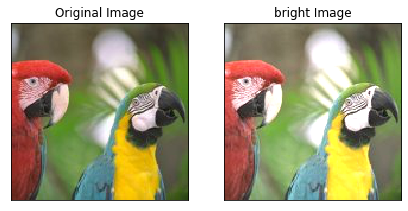

In [30]:
fig, axs = plt.subplots(1, 2,figsize=[7.,3.5]) 

axs[0].imshow(img)
axs[0].set_xticks([])
axs[0].set_yticks([])
axs[0].set_title("Original Image")

axs[1].imshow(bright_img)
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[1].set_title("bright Image")

データレンジを超えてクリッピングしてるというエラー(以下)がでてるので値を確認だけしてみる

```
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
```

In [31]:
print("maximau value =",bright_img.max(),", minimum value =",bright_img.min())

maximau value = 1.299718865882353 , minimum value = 0.0363847899607843


max valueが1を超えており、どうやら明るくしすぎた模様  
(1を超えた分は1でクリッピングされる模様)

### 6.DCT変換

ここにきて間引いているはずのCb,Crが1画素ごと違うのは、DCT変換によるものではないかということに気が付く  
つまりjpegデータ化の時は16x16pixelのブロックを間引いた8x8のデータをDCTで8x8のスペクトルにしているが、そのスペクトルデータをDCT逆変換で16x16に復元する際に間引かれた値が補完されているのではないかと、、、

とりあえずYCbCr画像をDCT変換してみることにした。

DCTは離散コサイン変換(Discreat Cosine Transration)でフーリエ変換と使って実数値であつかえる(複素数を扱わない)ので画像変換でよく使われる。

[scipy](https://docs.scipy.org/doc/scipy-0.14.0/reference/index.html)の[fftpack](https://docs.scipy.org/doc/scipy-0.14.0/reference/fftpack.html)パッケージにあるのでそれを使ってみる。計算式もリファレンスにある。

* DCT：[scypy.fftpack.dct()](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.fftpack.dct.html#scipy.fftpack.dct)
* DCT逆変換：[scypy.fftpack.dct()](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.fftpack.idct.html#scipy.fftpack.idct)

とりあえず範囲を限定するために先ほどクローズアップした箇所に限定してみる。

[]

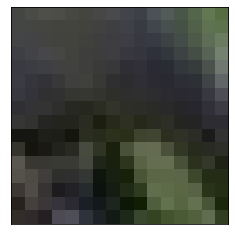

In [32]:
Target_img=img[64:80,128:144,:]
Target_Y_img=Y_img[64:80,128:144]
Target_Cb_img=Cb_img[64:80,128:144]
Target_Cr_img=Cr_img[64:80,128:144]

imgplot = plt.imshow(Target_img)
imgplot.axes.set_xticks([]) #x軸の目盛を削除
imgplot.axes.set_yticks([]) #y軸の目盛を削除

どうもScipyのライブラリのDCTは1次元のDCTなので軸を指定して2回実施する。いくつかタイプがあるが通常はtype=2(default)でOrthonormalizedのオプション(norm='ortho')をつける。そうするとtype=3のOrthonormalizedのDCTがスケールファクタをかけずにのまま逆変換に使える。

In [33]:
import scipy as sp
import scipy.fftpack as fft

DCT_spectrum_Y=fft.dct(fft.dct(Target_Y_img,n=16,axis=0,norm='ortho'),n=16,axis=1,norm='ortho')
DCT_spectrum_Cb=fft.dct(fft.dct(Target_Cb_img,n=16,axis=0,norm='ortho'),n=16,axis=1,norm='ortho')
DCT_spectrum_Cr=fft.dct(fft.dct(Target_Cr_img,n=16,axis=0,norm='ortho'),n=16,axis=1,norm='ortho')

type(DCT_spectrum_Y)

Text(0.5, 1.0, 'Cr DCT Spectrum')

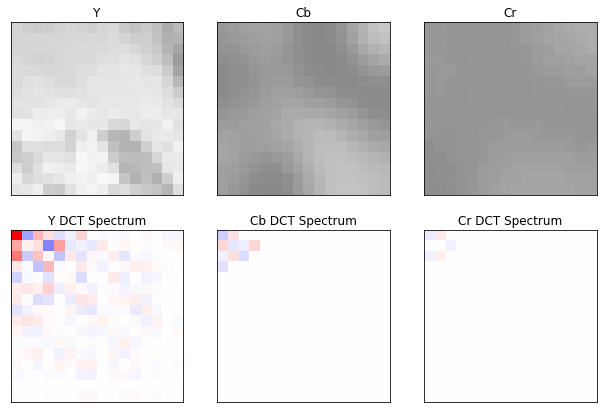

In [34]:
fig, axs = plt.subplots(2, 3,figsize=[10.5,7.]) 

axs[0][0].imshow(Target_Y_img,cmap="Greys",vmin=0,vmax=1)
axs[0][0].set_xticks([])
axs[0][0].set_yticks([])
axs[0][0].set_title("Y")

axs[0][1].imshow(Target_Cb_img,cmap="Greys",vmin=-0.2,vmax=0.2)
axs[0][1].set_xticks([])
axs[0][1].set_yticks([])
axs[0][1].set_title("Cb")

axs[0][2].imshow(Target_Cr_img,cmap="Greys",vmin=-0.2,vmax=0.2)
axs[0][2].set_xticks([])
axs[0][2].set_yticks([])
axs[0][2].set_title("Cr")

axs[1][0].imshow(DCT_spectrum_Y,cmap="bwr",vmin=-1,vmax=1)
axs[1][0].set_xticks([])
axs[1][0].set_yticks([])
axs[1][0].set_title("Y DCT Spectrum")

axs[1][1].imshow(DCT_spectrum_Cb,cmap="bwr",vmin=-1,vmax=1)
axs[1][1].set_xticks([])
axs[1][1].set_yticks([])
axs[1][1].set_title("Cb DCT Spectrum")

axs[1][2].imshow(DCT_spectrum_Cr,cmap="bwr",vmin=-1,vmax=1)
axs[1][2].set_xticks([])
axs[1][2].set_yticks([])
axs[1][2].set_title("Cr DCT Spectrum")

先述の通り,type=3としてscypy.fftpack.dct()をすれば逆変換ができるが、ここではscypy.fftpack.idct()を使ってみる。

Text(0.5, 1.0, 'Cr  IDCT')

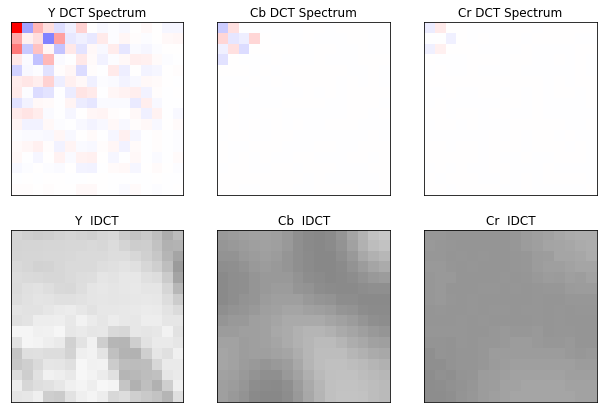

In [35]:
IDCT_Y=fft.idct(fft.idct(DCT_spectrum_Y,n=16,axis=0,norm='ortho'),n=16,axis=1,norm='ortho')
IDCT_Cb=fft.idct(fft.idct(DCT_spectrum_Cb,n=16,axis=0,norm='ortho'),n=16,axis=1,norm='ortho')
IDCT_Cr=fft.idct(fft.idct(DCT_spectrum_Cr,n=16,axis=0,norm='ortho'),n=16,axis=1,norm='ortho')
fig, axs = plt.subplots(2, 3,figsize=[10.5,7.]) 

axs[0][0].imshow(DCT_spectrum_Y,cmap="bwr",vmin=-1,vmax=1)
axs[0][0].set_xticks([])
axs[0][0].set_yticks([])
axs[0][0].set_title("Y DCT Spectrum")

axs[0][1].imshow(DCT_spectrum_Cb,cmap="bwr",vmin=-1,vmax=1)
axs[0][1].set_xticks([])
axs[0][1].set_yticks([])
axs[0][1].set_title("Cb DCT Spectrum")

axs[0][2].imshow(DCT_spectrum_Cr,cmap="bwr",vmin=-1,vmax=1)
axs[0][2].set_xticks([])
axs[0][2].set_yticks([])
axs[0][2].set_title("Cr DCT Spectrum")

axs[1][0].imshow(IDCT_Y,cmap="Greys",vmin=0,vmax=1)
axs[1][0].set_xticks([])
axs[1][0].set_yticks([])
axs[1][0].set_title("Y  IDCT")

axs[1][1].imshow(IDCT_Cb,cmap="Greys",vmin=-0.2,vmax=0.2)
axs[1][1].set_xticks([])
axs[1][1].set_yticks([])
axs[1][1].set_title("Cb  IDCT")

axs[1][2].imshow(IDCT_Cr,cmap="Greys",vmin=-0.2,vmax=0.2)
axs[1][2].set_xticks([])
axs[1][2].set_yticks([])
axs[1][2].set_title("Cr  IDCT")

とここまでDCT逆変換でもとのデータが復元ができていることがわかる。  
また、Cb,Crのスペクトルは縦横2分割したの左上8x8にしか成分を持っていないのがわかる。  
つまり、16x16の画素に対して8x8のスペクトル情報しかもたない。